Import pandas and matplot lib.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Load data set in as CSV.

In [4]:
file_path = 'ADA_profile_simplified.csv'  # replace with your actual file path
df = pd.read_csv(file_path)

Filter only for rows that are in the Greater Toronto Area.
Here we are using the Toronto CMA, which includes surrounding CMAs like Oshawa and Hamilton.

In [5]:
gta_df = df[df["CMANAME"].str.contains("Toronto", case=False, na=False)]

Select relevant columns: area name (CSDNAME), total immigrant population (T1529), and ADA code (ADA_code).

In [ ]:
immigrant_df = gta_df[["ADA_code", "CSDNAME", "T1529"]].copy()
immigrant_df = immigrant_df.rename(columns={"T1529": "Immigrant_Population"})
immigrant_df = gta_df.groupby("CSDNAME")["T1529"].sum().reset_index()
immigrant_df = immigrant_df.rename(columns={"T1529": "Immigrant_Population"})

Sort the popoulation by descending order.

In [7]:
immigrant_df = immigrant_df.sort_values(by="Immigrant_Population", ascending=False)

Plot values using matplotlib.

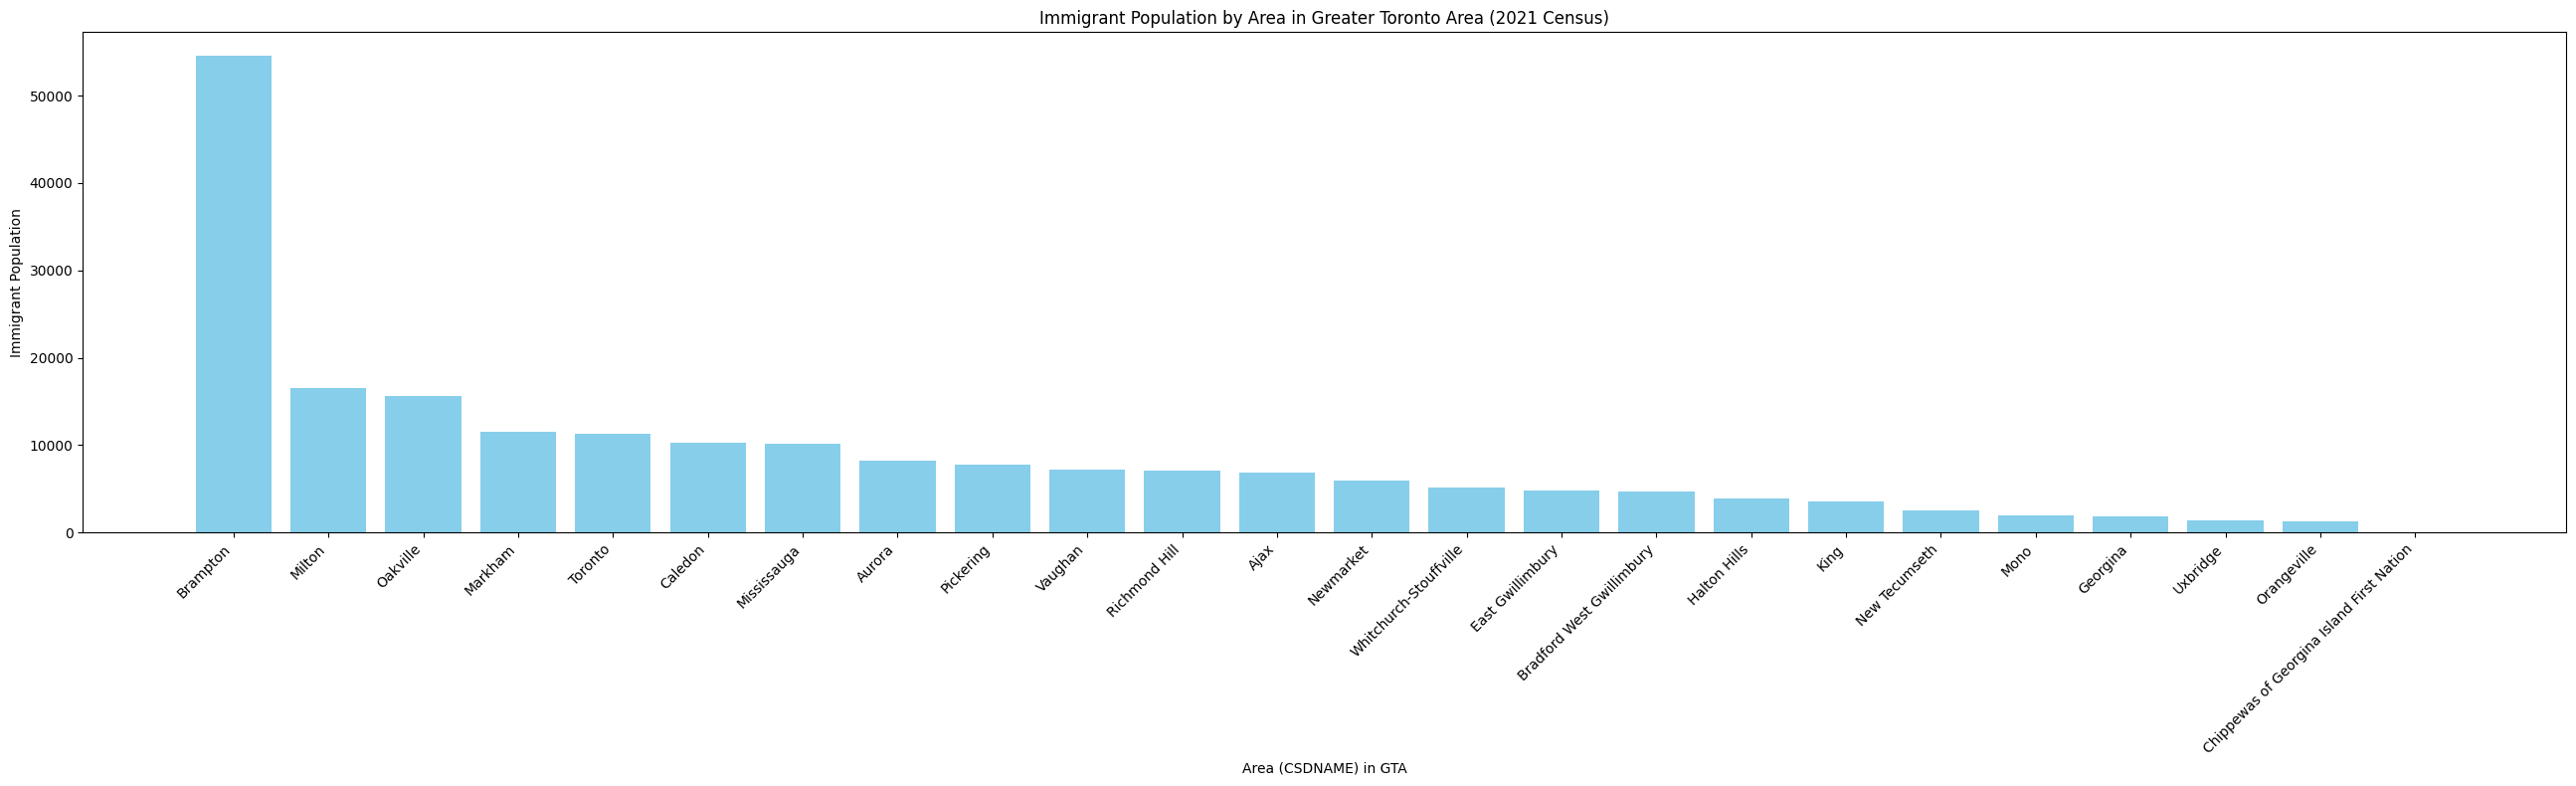

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(immigrant_df["CSDNAME"], immigrant_df["Immigrant_Population"], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Area (CSDNAME) in GTA")
plt.ylabel("Immigrant Population")
plt.title("Immigrant Population by Area in Greater Toronto Area (2021 Census)")
plt.tight_layout()
plt.show()

In [ ]:
immigrant_df

,ADA_code,CSDNAME,Immigrant_Population
2430,35210179,Brampton,54540.0
2537,35242001,Milton,16540.0
2486,35240011,Oakville,15640.0
2421,35210170,Brampton,15615.0
2529,35240061,Milton,13105.0
...,...,...,...
2159,35200191,Toronto,855.0
2451,35220008,Orangeville,675.0
1794,35180008,Uxbridge,650.0
2996,35430060,New Tecumseth,105.0


In [10]:
gta_df

,CMANAME,CMAUID,CSDNAME,CSDUID,PRNAME,ada_code_n,ADA_code,T1527,T1528,T1529,...,W1673,W1674,W1675,W1676,W1677,W1678,W1679,W1680,W1681,W1682
1789,Toronto,535,Uxbridge,3518029,Ontario,35180003,35180003,8980.0,7590.0,1355.0,...,140.0,25.0,0.0,375.0,0.0,25.0,30.0,30.0,0.0,280.0
1794,Toronto,535,Uxbridge,3518029,Ontario,35180008,35180008,5650.0,5005.0,650.0,...,70.0,35.0,0.0,180.0,0.0,25.0,0.0,10.0,0.0,130.0
1795,Toronto,535,Uxbridge,3518029,Ontario,35180009,35180009,6770.0,5880.0,880.0,...,90.0,20.0,0.0,215.0,10.0,30.0,15.0,0.0,0.0,160.0
1799,Toronto,535,Pickering,3518001,Ontario,35180013,35180013,7210.0,4820.0,2295.0,...,450.0,170.0,30.0,1015.0,140.0,55.0,25.0,15.0,0.0,780.0
1828,Toronto,535,Ajax,3518005,Ontario,35180053,35180053,7545.0,3600.0,3870.0,...,830.0,275.0,45.0,1830.0,175.0,115.0,15.0,70.0,20.0,1435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,Toronto,535,New Tecumseth,3543007,Ontario,35430062,35430062,8340.0,6845.0,1450.0,...,235.0,160.0,20.0,535.0,50.0,35.0,0.0,25.0,15.0,400.0
3001,Toronto,535,Bradford West Gwillimbury,3543014,Ontario,35430066,35430066,10190.0,6680.0,3440.0,...,625.0,400.0,20.0,1545.0,165.0,85.0,15.0,55.0,20.0,1210.0
3002,Toronto,535,Bradford West Gwillimbury,3543014,Ontario,35430067,35430067,13325.0,8510.0,4725.0,...,840.0,470.0,50.0,1990.0,155.0,150.0,45.0,60.0,15.0,1560.0
3003,Toronto,535,New Tecumseth,3543007,Ontario,35430068,35430068,8930.0,7385.0,1510.0,...,265.0,145.0,30.0,640.0,70.0,65.0,20.0,15.0,0.0,455.0
